<a href="https://colab.research.google.com/github/joshuasalazar984/Telecommunication-Customer-Satisfaction-Prediction-using-Decision-Tree-Classifier/blob/master/Telecommunication_Customer_Satisfaction_Prediction_using_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definition of Data

Customer Satisfaction Results: After each contact with TelCo, customers are asked to take a customer
satisfaction survey. The information on this tab corresponds to the survey questions below:
1. Considering everything from the time you placed your call until this call was completed, how
would you rate your overall contact experience? Please use a scale of 1 to 5, where 5 is excellent
and 1 is poor, and you may use any number between 1 and 5.
2. Now that we&#39;ve gotten your feedback about your overall experience, we&#39;d like you to think now
JUST about the service provided by the person who assisted you. Thinking about the LAST person
who handled your call, how would you rate that service professional on the following aspects,
using the same scale of 1 to 5, where 5 is excellent and 1 is poor.
a. The overall quality of the service provided by that particular service professional
b. Ability to resolve your issue
c. Being courteous
d. Being knowledgeable about products and services




In [0]:
#Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [143]:
#Upload data to Google Colab

from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['Telco.csv'].decode('utf-8')))

Saving Telco.csv to Telco (1).csv


In [146]:
df.head()

,1. Overall Experience,2a. Agent Quality of Service,2b. Resolve Issue,2c. Courteous,2d. Knowledgeable,Agent Role,Agent Tenure,Call Reason,Call Resolution
0,3,2,1,3,1,Tier 1,0-30,Add Services,Transfer (Other Dept)
1,4,3,3,4,4,Tier 1,0-30,Make Payment,Explain Bill (no changes made)
2,2,4,3,5,4,Tier 1,0-30,Make Payment,Phone Disconnect
3,3,4,4,3,4,Tier 1,0-30,Make Payment,Process Payment
4,5,5,4,5,5,Tier 1,0-30,Add Services,Add Minutes


In [0]:
#Removing irrelevant columns

df = df.drop(["Account Number", "Interaction ID", "Agent ID", "Call Date"], axis=1)

# Exploratory Analysis

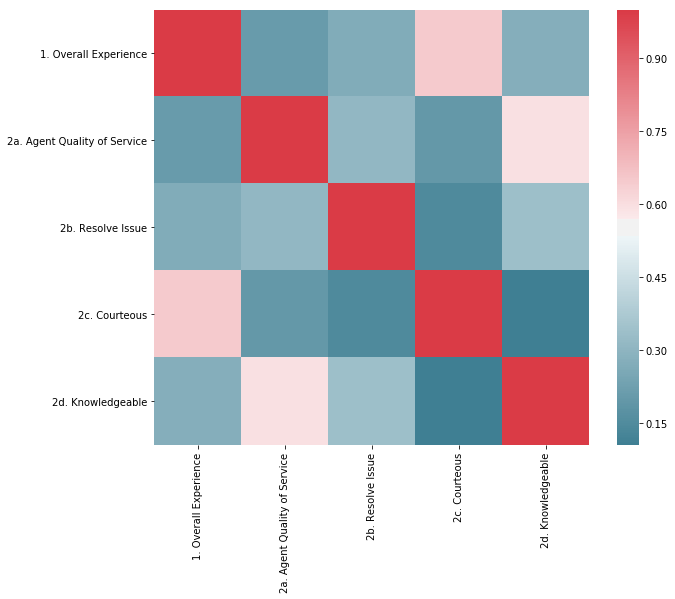

In [71]:
#Which survey parameters correlate with overall satisfaction score


f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(method="kendall")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [70]:
df.corr(method="kendall")

#Only courteousness is showing a medium correlation with overall experience. The rest are showing weak correlation which is below .30

,1. Overall Experience,2a. Agent Quality of Service,2b. Resolve Issue,2c. Courteous,2d. Knowledgeable
1. Overall Experience,1.000000,0.207979,0.266547,0.647503,0.276745
2a. Agent Quality of Service,0.207979,1.000000,0.309608,0.196840,0.597152
2b. Resolve Issue,0.266547,0.309608,1.000000,0.146044,0.336689
2c. Courteous,0.647503,0.196840,0.146044,1.000000,0.105197
2d. Knowledgeable,0.276745,0.597152,0.336689,0.105197,1.000000


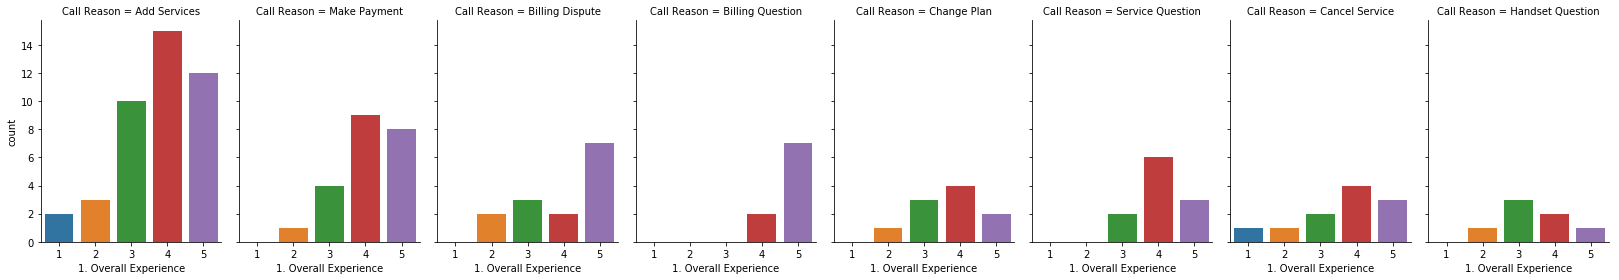

In [50]:
#Overall experience score per call type

sns.catplot(x="1. Overall Experience", col="Call Reason",
                data=df, kind="count",
                height=4, aspect=.7)

#Add services, make a payment, billing dispute and cancel service are calls which give us the most 1s and 2s

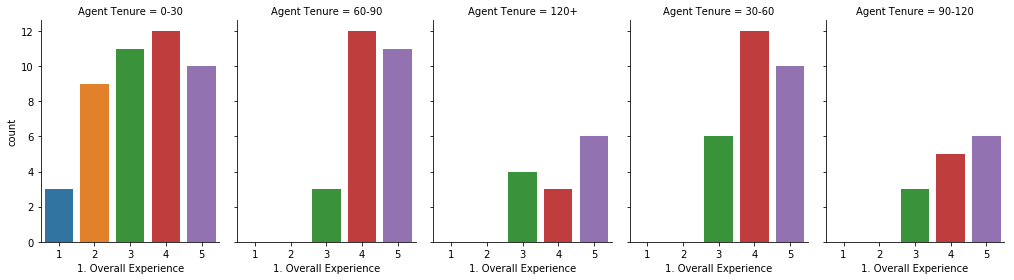

In [49]:
#Overall experience score per tenure group

sns.catplot(x="1. Overall Experience", col="Agent Tenure",
                data=df, kind="count",
                height=4, aspect=.7)

#Only tenure group 0-30 have 1 and 2 surveys scores

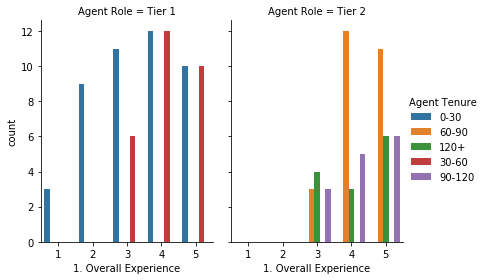

In [58]:
#Overall experience score per agent tier

sns.catplot(x="1. Overall Experience", col="Agent Role", hue="Agent Tenure",
                data=df, kind="count",
                height=4, aspect=.7)

#Agent tier is divided per tenure

#0-60 for tier 1 and 61-120 for tier 2

In [30]:
df.columns

Index(['Call Date', '1. Overall Experience', '2a. Agent Quality of Service',
       '2b. Resolve Issue', '2c. Courteous', '2d. Knowledgeable', 'Agent Role',
       'Agent Tenure', 'Call Reason', 'Call Resolution'],
      dtype='object')

In [122]:
#Call type distribution 


pd.pivot_table(df,index=["Agent Role","Call Reason"], values=["1. Overall Experience"], aggfunc=[np.median, sum])

#Opportunity to improve overall satisfaction is on change plan and handset question for tier 1

median                   sum
                            1. Overall Experience 1. Overall Experience
Agent Role Call Reason                                                 
Tier 1     Add Services                       4.0                    92
           Billing Dispute                    4.5                    31
           Billing Question                   5.0                    24
           Cancel Service                     4.0                    23
           Change Plan                        3.0                    21
           Handset Question                   3.5                    13
           Make Payment                       4.0                    35
           Service Question                   4.0                    29
Tier 2     Add Services                       5.0                    66
           Billing Dispute                    4.5                    25
           Billing Question                   5.0                    19
           Cancel Service                     4.5                    17
           Change Plan                        4.0                    16
           Handset Question                   3.0                    11
           Make Payment                       4.0                    55
           Service Question                   4.0                    16

# Customer Satisfaction Prediction

In [0]:
#Conver object to integers so sklearn will be able to understand them.

obj_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index

for o in obj_cols:
    df[o] = pd.factorize(df[o])[0]

In [172]:
df.dtypes

1. Overall Experience           int64
2a. Agent Quality of Service    int64
2b. Resolve Issue               int64
2c. Courteous                   int64
2d. Knowledgeable               int64
Agent Role                      int64
Agent Tenure                    int64
Call Reason                     int64
Call Resolution                 int64
dtype: object

In [0]:
#Creating the training and testing data

from sklearn.model_selection import train_test_split

X=df.drop("1. Overall Experience", axis=1)
y=df["1. Overall Experience"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
#Decision Trees

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [0]:
dtree.fit(X_train, y_train)
pred=dtree.predict(X_test)

In [180]:
from sklearn.metrics import classification_report, confusion_matrix
pred_dtree=dtree.predict(X_test)
print(classification_report(y_test, pred_dtree))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.25      1.00      0.40         1
           3       0.75      0.67      0.71         9
           4       0.75      0.64      0.69        14
           5       0.67      0.71      0.69        17

    accuracy                           0.67        42
   macro avg       0.48      0.60      0.50        42
weighted avg       0.69      0.67      0.67        42



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [181]:
confusion_matrix(y_test, pred_dtree)

array([[ 0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0],
       [ 0,  0,  6,  1,  2],
       [ 0,  0,  1,  9,  4],
       [ 0,  2,  1,  2, 12]])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


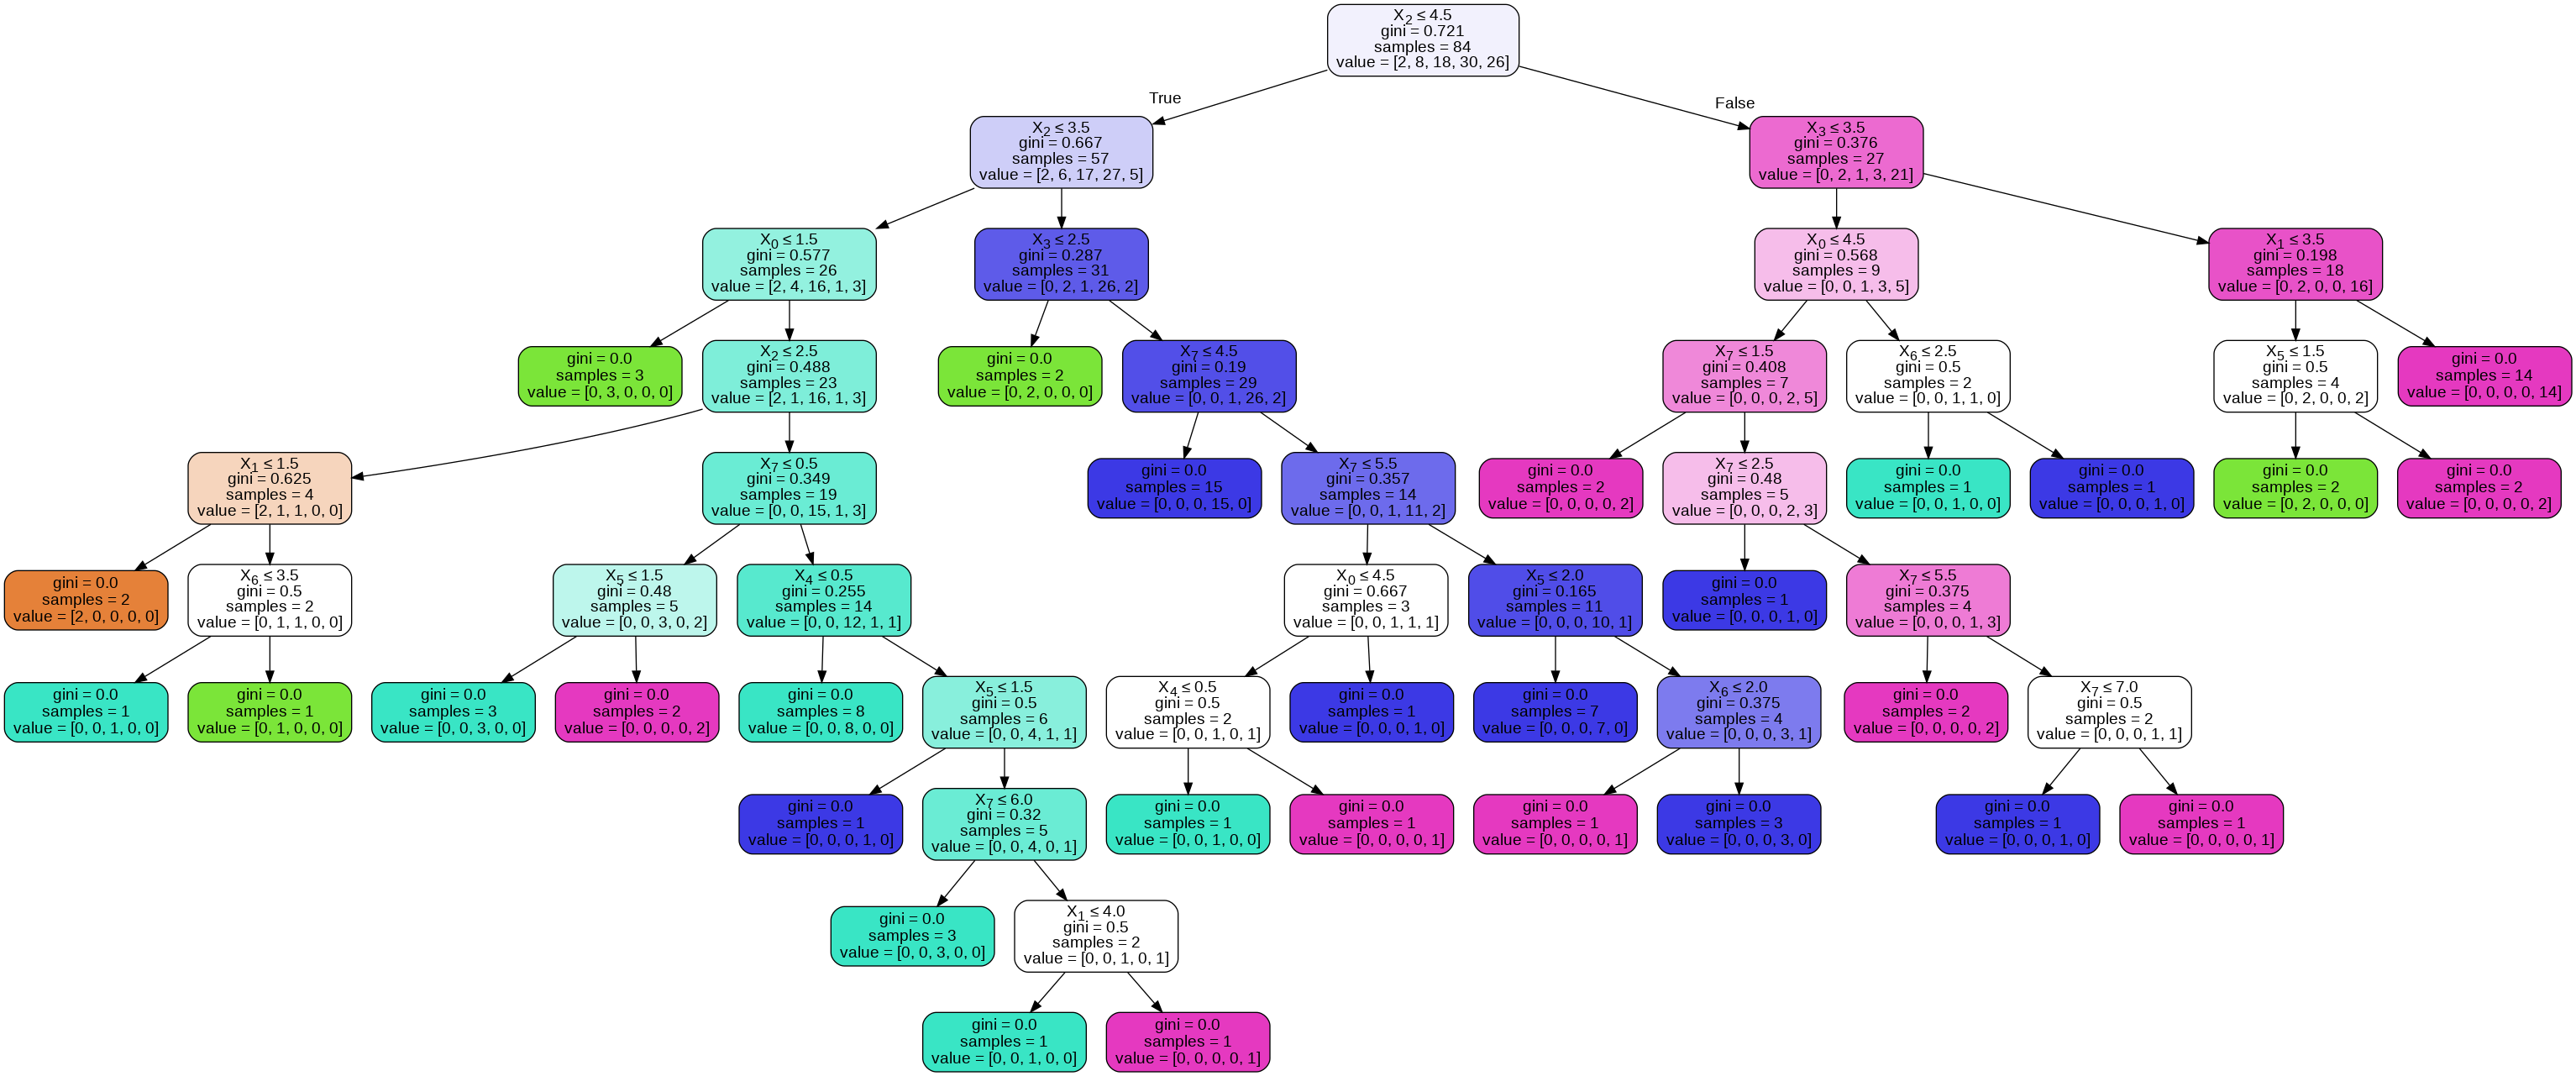

In [182]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())